In [82]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt  

In [83]:
from azureml import Workspace
ws = Workspace(
    workspace_id='3c64d445b4c840dca9683dd47522eba3',
    authorization_token='JaC5E2q5FouX14JhvCmcvmzagqV63q0oVIbu2jblLBdQ5e5wf/Y24Ed6uXLvbSUgbiao5iF85C3uufYKQgXoNw==',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['boston.csv']
dataset = ds.to_dataframe()

In [84]:
dataset.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
y = dataset['target']  
X = dataset['RM']  
X = sm.add_constant(X)

In [86]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [87]:
type(X)

pandas.core.frame.DataFrame

In [88]:
linear_regression = sm.OLS(y,X)

In [89]:
fitted_model = linear_regression.fit()

If we had wanted to manage the same result using the StatsModels.formula.api, we should have typed the following:

linear_regression = smf.ols(formula='target ~ RM', data=dataset)  
fitted_model = linear_regression.fit()

The coefficient of determinationLet's start from the first table of results. The first table is divided into two columns. The first one contains a description of the fitted model:Dep. Variable: It just reminds you what the target variable wasModel: Another reminder of the model that you have fitted, the OLS is ordinary least squares, another way to refer to linear regressionMethod: The parameters fitting method (in this case least squares, the classical computation method)No. Observations: The number of observations that have been usedDF Residuals: The degrees of freedom of the residuals, which is the number of observations minus the number of parameters
DF Model: The number of estimated parameters in the model (excluding the constant term from the count)The second table gives a more interesting picture, focusing how good the fit of the linear regression model is and pointing out any possible problems with the model:R-squared: This is the coefficient of determination, a measure of how well the regression does with respect to a simple mean.Adj. R-squared: This is the coefficient of determination adjusted based on the number of parameters in a model and the number of observations that helped build it.F-statistic: This is a measure telling you if, from a statistical point of view, all your coefficients, apart from the bias and taken together, are different from zero. In simple words, it tells you if your regression is really better than a simple average.Prob (F-statistic): This is the probability that you got that F-statistic just by lucky chance due to the observations that you have used (such a probability is actually called the p-value of F-statistic). If it is low enough you can be confident that your regression is really better than a simple mean. Usually in statistics and science a test probability has to be equal or lower than 0.05 (a conventional criterion of statistical significance) for having such a confidence.AIC: This is the Akaike Information Criterion. AIC is a score that evaluates the model based on the number of observations and the complexity of the model itself. The lesser the AIC score, the better. It is very useful for comparing different models and for statistical variable selection.BIC: This is the Bayesian Information Criterion. It works as AIC, but it presents a higher penalty for models with more parameters.Most of these statistics make sense when we are dealing with more than one predictor variable, so they will be discussed in the next chapter. Thus, for the moment, as we are working with a simple linear regression, the two measures that are worth examining closely are F-statistic and R-squared. F-statistic is actually a test that doesn't tell you too much if you have enough observations and you can count on a minimally correlated predictor variable. Usually it shouldn't be much of a concern in a data science project.R-squared is instead much more interesting because it tells you how much better your regression model is in comparison to a single mean. It does so by providing you with a percentage of the unexplained variance of a mean as a predictor that actually your model was able to explain.

Meaning and significance of coefficientsThe second output table informs us about the coefficients and provides us with a series of tests. These tests can make us confident that we have not been fooled by a few extreme observations in the foundations of our analysis or by some other problem:coef: The estimated coefficientstd err: The standard error of the estimate of the coefficient; the larger it is, the more uncertain the estimation of the coefficientt: The t-statistic value, a measure indicating whether the coefficient true value is different from zeroP > |t|: The p-value indicating the probability that the coefficient is different from zero just by chance[95.0% Conf. Interval]: The lower and upper values of the coefficient, considering 95% of all the chances of having different observations and so different estimated coefficientsFrom a data science viewpoint, t-tests and confidence bounds are not very useful because we are mostly interested in verifying whether our regression is working while predicting answer variables. Consequently, we will focus just on the coef value (the estimated coefficients) and on their standard error.The coefficients are the most important output that we can obtain from our regression model because they allow us to re-create the weighted summation that can predict our outcomes.

In [90]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        05:36:27   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
print (fitted_model.params)  
betas = np.array(fitted_model.params)  
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


ç¬¬ä¸ä¸ªåæ°æ¯y0å¼ï¼å³x=0æ¶ï¼yè½´ä¸çå¼ã
ç¬¬äºä¸ªæ¯æç
è¿ä¸¤ä¸ªæ¯æéè¦çåæ°
y=9.10*X-34.67è¿æ¯æåçæ²çº¿å¬å¼ãä½è¦æ³¨æå®åªå¯¹ä¸å®çæ°æ®èå´ææï¼è¾å¥çXå¨3.56å°8.7799èå´åï¼æä»¥å¬å¼åªéç¨äºè¿ä¸ªèå´

In [92]:
betas

array([-34.67062078,   9.10210898])

In [93]:
dataset['RM'].mean()

6.284634387351788

In [94]:
dataset['RM'].min()

3.5610000000000004

In [95]:
dataset['RM'].max()

8.7799999999999994

In [96]:
def standardize(x):
    return (x-np.mean(x))/np.std(x)

The resulting scatterplot indicates that the residuals show some of the problems we previously indicated as a warning that something is not going well with your regression analysis. First, there are a few points lying outside the band delimited by the two dotted lines at normalized residual values â3 and +3 (a range that should hypothetically cover 99.7% of values if the residuals have a normal distribution). These are surely influential points with large errors and they can actually make the entire linear regression under-perform. We will talk about possible solutions to this problem when we discuss outliers in the next chapter.

In [97]:
x_range=[dataset['RM'].min(),dataset['RM'].max()]
residuals = dataset['target']-fitted_values  
normalized_residuals = standardize(residuals)
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals,'bp')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color='red', linewidth=1)
plt.grid()
#plt.show()

In [98]:
RM = 5  
Xp = np.array([1,RM])  
print ("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))

Our model predicts if RM = 5 the answer value is 10.8


In [99]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]  
y_range = [dataset['target'].min(),dataset['target'].max()]  
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target',xlim=x_range, ylim=y_range) 
regression_line = scatter_plot.plot(dataset['RM'], fitted_values,'-', color='orange', linewidth=1)
meanY = scatter_plot.plot(x_range,[dataset['target'].mean(),dataset['target'].mean()], '--',color='red', linewidth=1)  
meanX =scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)  

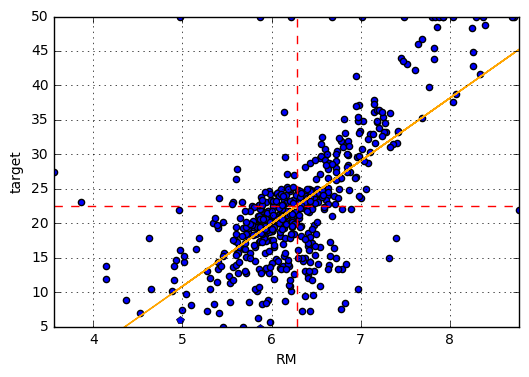

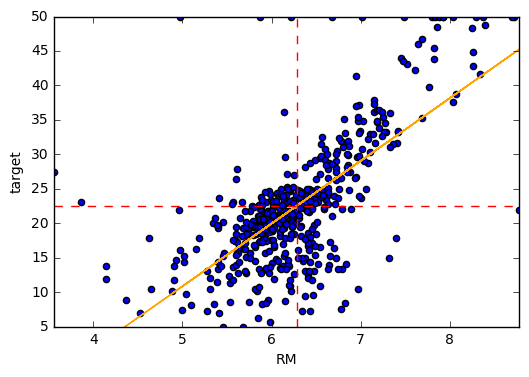

In [100]:
plt.show()